In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import os.path
from os import path
import missingno as msno

In [3]:
list_meses = ["enero","febrero", "marzo", "abril", "mayo", "junio", 
              "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]
list_classes = ["Resto","Cabecera","Área"]

In [32]:
dtypes = {'INGLABO': 'int'}

# Concatenando meses y clases

In [57]:
df_ocupados = pd.DataFrame()
df_personas = pd.DataFrame()
for i in tqdm(list_meses):
    for j in list_classes:
        df_temp_ocupados = pd.read_csv("../Data/Geih2019/"+i+".csv/"+i+".csv/"+j+" - Ocupados.csv", 
                                       delimiter=";", low_memory=False)
        path_personas  ="../Data/Geih2019/"+i+".csv/"+i+".csv/"+j+" - Características generales (Personas).csv"
        # a veces características tiene tilde
        if path.exists(path_personas):
            df_temp_personas = pd.read_csv(path_personas, 
                                       delimiter=";", low_memory=False)
        else:
            path_personas  ="../Data/Geih2019/"+i+".csv/"+i+".csv/"+j+" - Caracteristicas generales (Personas).csv"
            if path.exists(path_personas):
                df_temp_personas = pd.read_csv(path_personas, 
                                       delimiter=";", low_memory=False)
            else:
                print("no existe archivo de personas para el mes " + i)
        # Adiciono algunas características
        df_temp_ocupados["mes_encuesta"] =i
        df_temp_ocupados["categoria_area"] = j
        df_temp_personas["mes_encuesta"] =i
        df_temp_personas["categoria_area"] = j
        # concateno
        df_ocupados = df_ocupados.append(df_temp_ocupados)
        df_personas = df_personas.append(df_temp_personas)


    

In [58]:
dict_var_personas = {
    "P6210":"¿cuál es el nivel educativo más alto alcanzado por ... Y el último año o grado aprobado en este nivel?",
    "P6210S1": "grado",
    "P6220": "¿cuál es el título o diploma de mayor nivel educativo que usted ha recibido?",
    "ESC": "años de escolaridad",
    "P6020": "genero",
    "DPTO": "departamento",

}
dict_var_personas_translate = {
    "P6210":"max_nivel_edu",
    "P6210S1": "grado",
    "P6220": "max_titulo",
    "ESC": "anos_escolaridad",
    "P6020": "genero",
    "DPTO": "departamento",

}

dict_var_ocupados = {
    "P388":"departamento en el que hace el trabajo",
    "P6600S1": "vivienda como pago de salario",
    "INGLABO": "ingresos laborales",
    "P6426": "cuanto tiempo lleva trabajando en la industria lugar ",
    "CLASE": "rural urbana",
    "P6800": "¿cuántas horas a la semana trabaja normalmente ... En ese trabajo?",
    "OFICIO": "Que hace en este trabajo?"
}

dict_var_ocupados_translate = {
    "P388":"departamento_trabaja",
    "P6600S1": "vivienda_especie",
    "INGLABO": "ingresos_laborales",
    "P6426": "experiencia_anos",
    "CLASE": "zona",
    "P6800" : "hrs_trabajadas",
    "OFICIO": "oficio"
}

## Adicionar característica

In [59]:
def oficio_clase(ofi):
    if ofi == 4141:
        res = "basica_secundaria_y_media"
    if ofi == 4142:
        res = "basica_primaria"
    if ofi == 4143:
        res == "preescolar"
    else:
        res = "otro"
        

In [60]:
df_personas_sort = df_personas[['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR', 'REGIS'] + list(dict_var_personas)]
df_ocupados_sort = df_ocupados[['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR', 'REGIS'] + list(dict_var_ocupados)]

In [61]:
df_todos = df_personas_sort.merge(
    right = df_ocupados_sort,
    left_on=['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR' ],
    right_on=['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR']
)


In [62]:
df_todos["oficio_clasificado"] = df_todos["OFICIO"].apply(lambda x: oficio_clase(x))

### Actualiza nombres de columnas

In [63]:
dict_columns = {}
dict_columns.update(dict_var_ocupados_translate)
dict_columns.update(dict_var_personas_translate)
dict_columns

{'P388': 'departamento_trabaja',
 'P6600S1': 'vivienda_especie',
 'INGLABO': 'ingresos_laborales',
 'P6426': 'experiencia_anos',
 'CLASE': 'zona',
 'P6800': 'hrs_trabajadas',
 'OFICIO': 'oficio',
 'P6210': 'max_nivel_edu',
 'P6210S1': 'grado',
 'P6220': 'max_titulo',
 'ESC': 'anos_escolaridad',
 'P6020': 'genero',
 'DPTO': 'departamento'}

In [64]:
df_todos = df_todos[['P6210',
       'P6210S1', 'P6220', 'ESC', 'P6020', 'DPTO', 'REGIS_y', 'P388',
       'P6600S1', 'INGLABO', 'P6426', 'CLASE', "OFICIO"]].rename(columns=dict_columns)

In [65]:
df_todos.to_csv("../Data/todos.csv")

### Valores nulos

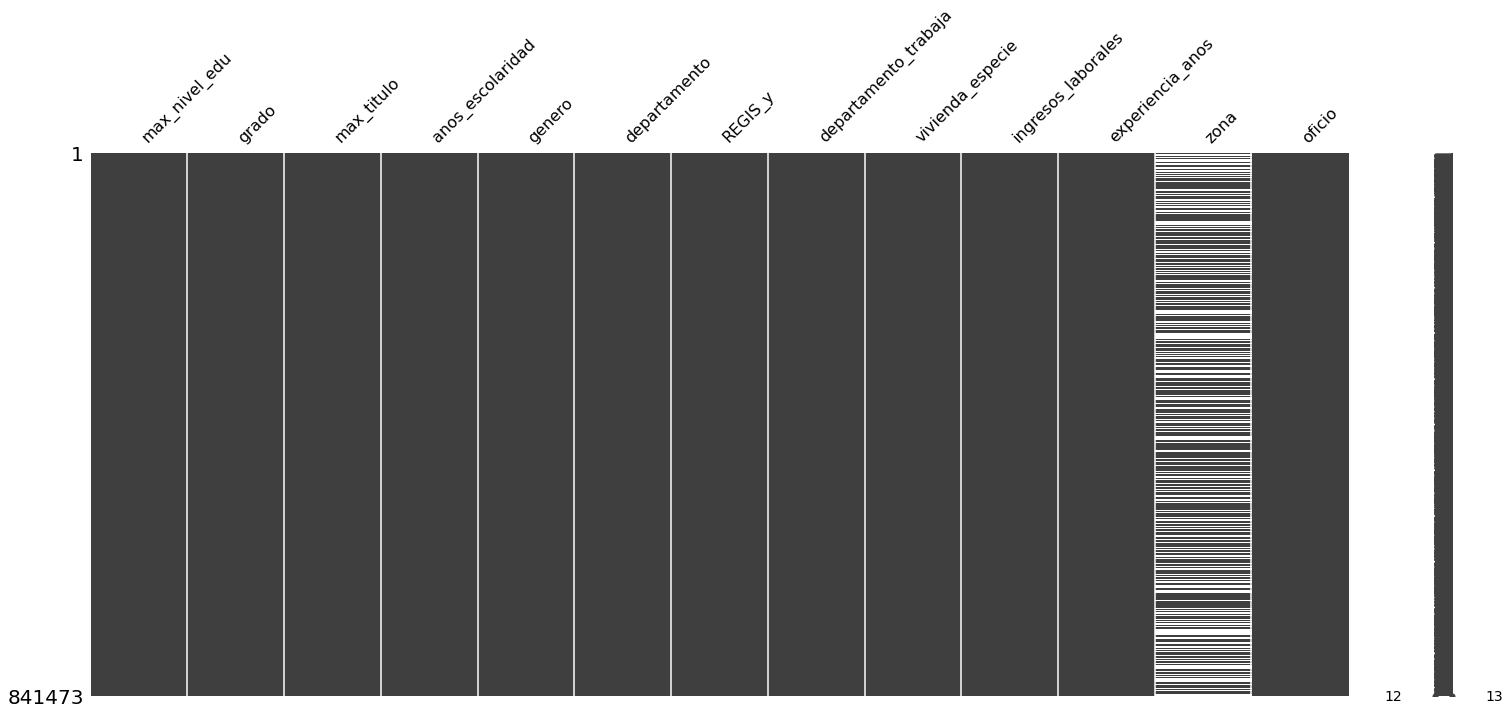

In [66]:
msno.matrix(df_todos)

In [67]:
XY = ["genero","anos_escolaridad", "experiencia_anos", "zona",  "departamento", "ingresos_laborales"]
X = XY[:-1]
Y = XY[-1:]

### convertir a numerico

In [72]:
def cleanspaces(txt):
    if type(txt) == int:
        res = txt
    else:
        res = txt.strip()
    return res

In [73]:
numeric_vars =  ["genero","anos_escolaridad", "experiencia_anos",  "departamento", "ingresos_laborales"]
for i in numeric_vars:
    df_todos[i] = df_todos[i].apply(lambda x: cleanspaces(x))
    df_todos[i] = pd.to_numeric(df_todos[i])

In [74]:
df_todos[df_todos.columns.intersection(XY)]

,anos_escolaridad,genero,departamento,ingresos_laborales,experiencia_anos,zona
0,11.0,1,23,510000.0,64,2.0
1,5.0,1,23,200000.0,72,2.0
2,2.0,2,23,250000.0,48,2.0
3,4.0,1,23,340000.0,129,2.0
4,2.0,2,23,80000.0,12,2.0
...,...,...,...,...,...,...
841468,13.0,2,44,150000.0,48,1.0
841469,11.0,1,44,900000.0,204,1.0
841470,9.0,2,44,600000.0,24,1.0
841471,13.0,2,44,500000.0,7,1.0


# Exploración de datos

In [75]:
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


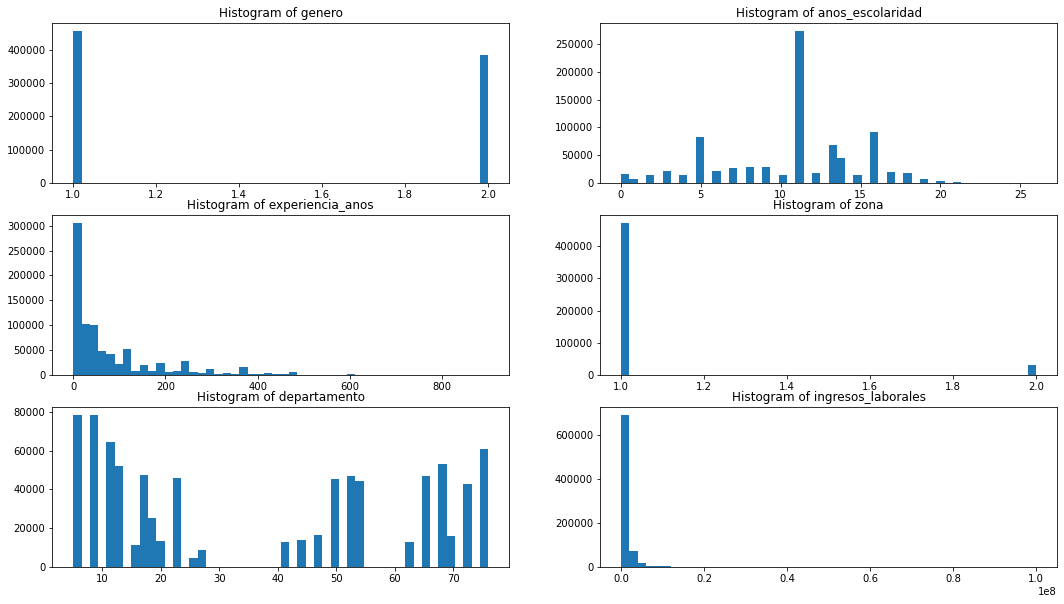

In [76]:
plt.figure(figsize=(18,10))
for i, var in enumerate(XY):
    plt.subplot(3,2,i+1)
    plt.hist(df_todos[var],50)
    title_string = "Histogram of " + var
    plt.title(title_string)

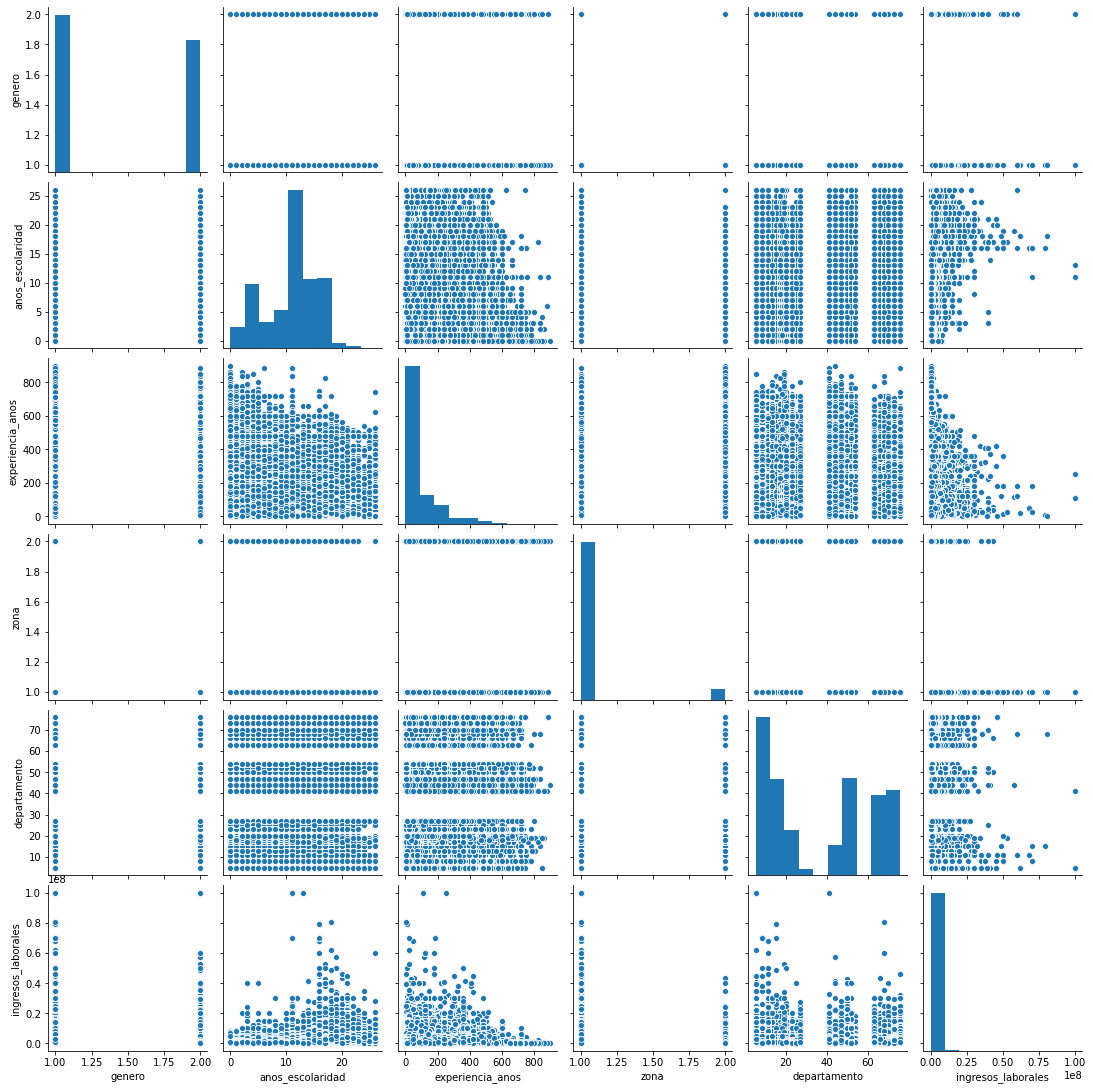

In [77]:
import seaborn as sns
sns.pairplot(df_todos[XY])

# Regresión Lineal OLS

In [78]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [79]:
df_todos[Y]

,ingresos_laborales
0,510000.0
1,200000.0
2,250000.0
3,340000.0
4,80000.0
...,...
841468,150000.0
841469,900000.0
841470,600000.0
841471,500000.0


In [80]:
df_todos[X]

,genero,anos_escolaridad,experiencia_anos,zona,departamento
0,1,11.0,64,2.0,23
1,1,5.0,72,2.0,23
2,2,2.0,48,2.0,23
3,1,4.0,129,2.0,23
4,2,2.0,12,2.0,23
...,...,...,...,...,...
841468,2,13.0,48,1.0,44
841469,1,11.0,204,1.0,44
841470,2,9.0,24,1.0,44
841471,2,13.0,7,1.0,44


In [95]:
import math as math
df_todos_fil = df_todos[df_todos["ingresos_laborales"]>0].copy()

In [96]:
df_todos_fil["ingresos_laborales_log"] = np.log(df_todos["ingresos_laborales"])

In [98]:
XC = sm.add_constant(df_todos[X])
mod2 = smf.ols(formula="ingresos_laborales_log ~ experiencia_anos + anos_escolaridad + genero + zona + departamento", data=df_todos_fil).fit()

print(mod2.summary())

                              OLS Regression Results                              
Dep. Variable:     ingresos_laborales_log   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.283
Method:                     Least Squares   F-statistic:                 3.684e+04
Date:                    Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                            11:56:48   Log-Likelihood:            -5.5810e+05
No. Observations:                  467570   AIC:                         1.116e+06
Df Residuals:                      467564   BIC:                         1.116e+06
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [27]:
type(df_todos["ingresos_laborales"].loc[0])

str

In [52]:
df_todos["ingresos_laborales"].values

array(['510000', '200000', '250000', ..., '600000', '500000', '3000000'],
      dtype=object)

In [100]:
smf.ols?